In [18]:
import sys
import gym
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from ddpg import DDPGagent
from utils import *
from IPython.display import clear_output

In [19]:
NUM_EPISODES = 50


  0%|          | 0/50 [00:00<?, ?it/s]c:\users\leeji\pycharmprojects\algorithms\venv\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\leeji\pycharmprojects\algorithms\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


episode: 0, reward: -1413.55, average _reward: nan 
episode: 1, reward: -1334.33, average _reward: -1413.552307206938 
episode: 2, reward: -1667.42, average _reward: -1373.9407572581085 
episode: 3, reward: -1457.94, average _reward: -1471.765640118966 
episode: 4, reward: -1177.83, average _reward: -1468.30901278605 
episode: 5, reward: -922.53, average _reward: -1410.212659090263 
episode: 6, reward: -1029.88, average _reward: -1328.9324109202846 
episode: 7, reward: -1012.48, average _reward: -1286.2102628056814 
episode: 8, reward: -760.77, average _reward: -1251.993779648295 
episode: 9, reward: -515.32, average _reward: -1197.4133123612846 
episode: 10, reward: -384.7, average _reward: -1129.2038202075246 
episode: 11, reward: -371.43, average _reward: -1026.3182708972972 
episode: 12, reward: -627.73, average _reward: -930.0285581163947 
episode: 13, reward: -640.3, average _reward: -826.0600521690833 
episode: 14, reward: -388.34, average _reward: -744.2957080292344 
episode: 1

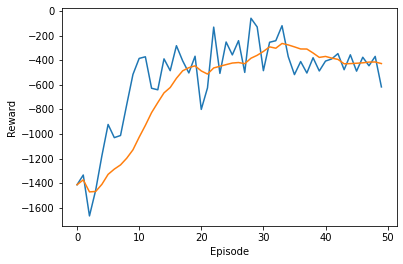

In [20]:
env = NormalizedEnv(gym.make("Pendulum-v0"))

agent = DDPGagent(env)
noise = OUNoise(env.action_space)
batch_size = 128
rewards = []
avg_rewards = []

for episode in tqdm(range(NUM_EPISODES)):
    state = env.reset()
    noise.reset()
    episode_reward = 0

    for step in range(500):
        action = agent.get_action(state)
        action = noise.get_action(action, step)
        new_state, reward, done, _ = env.step(action)
        agent.memory.push(state, action, reward, new_state, done)

        if len(agent.memory) > batch_size:
            agent.update(batch_size)

        state = new_state
        episode_reward += reward

        if done:
            sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

agent.save('ddpg_actor.pt')
plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [21]:
def np2tsr(state):
    return torch.from_numpy(state).float().unsqueeze(0)

In [24]:
model = torch.load('ddpg_actor.pt')
state = np2tsr(env.reset())
for step in range(500):
    env.render()
    action = model(state).squeeze().detach().numpy()
    new_state, reward, done, _ = env.step(action)
    state = np2tsr(new_state)
    episode_reward += reward

    if done:
        env.close()
        print(f"episode: {episode}, reward: {np.round(episode_reward, decimals=2)}, average _reward: {np.mean(rewards[-10:])} \n")
        break

episode: 49, reward: -857.67, average _reward: -426.6017281600615 

